In [1]:
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt

#### Генерация выборки объемом 1000

In [2]:
# параметры распределения
k = 4.0
xm = 3.0

In [3]:
n_samples = 1000

distribution = sts.pareto(k, loc=0, scale=xm)
distribution_sample = distribution.rvs(n_samples) # генерируем выборку заданного объёма

print(f"Theoretical mean: {distribution_sample.mean()}")
print(f"Theoretical standard deviation: {distribution_sample.std()}")

Theoretical mean: 4.055960465231822
Theoretical standard deviation: 1.5591982594330815


#### Построение гистограммы выборки и графика теоритеческой плотности распределения случайной величины

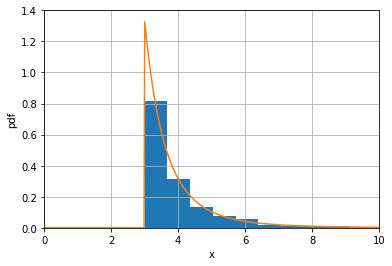

In [4]:
# гистограмма выборки
plt.hist(distribution_sample, bins=30, density=True)

# теоретическая плотность распределения 
x = np.linspace(0, 20, 1000)
pdf = distribution.pdf(x)
plt.plot(x, pdf)
plt.grid()
plt.axis([0, 10, 0, 1.4])
plt.xlabel("x")
plt.ylabel("pdf")

plt.show()

#### Генерация 1000 выборой объёма n (5, 10, 50) и построение гистограммы распределений их выборочных средних

In [5]:
n = [5, 10, 50] # объемы
n_volumes = len(n)

In [6]:
distribution_samples = np.zeros((n_volumes, n_samples)) # массив для хранения выборочных средних

# Вычисляем выборочные средние значения и заносим в массив
for i, n_i in enumerate(n):
    
    for j in range(n_samples):
        distribution_samples[i, j] = np.array(sts.pareto.rvs(k, loc=0, scale=xm, size=n_i)).mean()

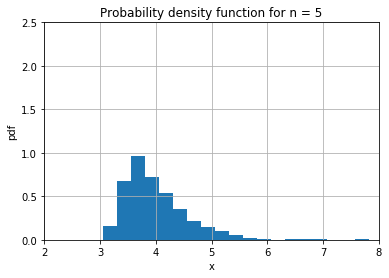

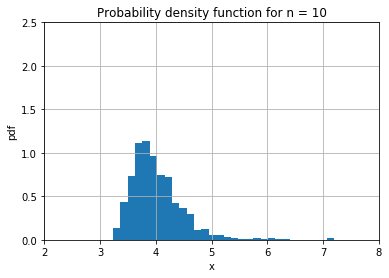

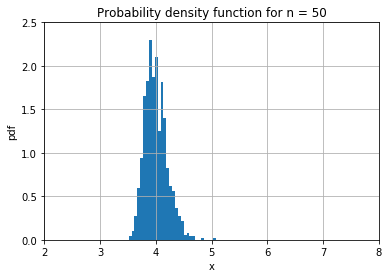

In [7]:
for i, n_i in enumerate(n):
    
    plt.hist(distribution_samples[i], bins=30, density=True)
    
    plt.title(f"Probability density function for n = {n_i}")
    
    plt.xlabel("x")
    plt.ylabel("pdf")
    
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    
    plt.show()

#### Вычисление параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближается распределение выборочных средних

In [8]:
distribution_sample_mean = k * xm / (k - 1) # мат ождание
print(f"Математическое ожидания: {distribution_sample_mean}")

distribution_sample_variance = np.zeros((n_volumes)) # дисперсия

for i in range(n_volumes):
    distribution_sample_variance[i] = xm**2 * k / ((k - 1)**2 * (k - 2)) / n[i]
    print(f"Дисперсия для n = {n[i]}: {distribution_sample_variance[i]}")

Математическое ожидания: 4.0
Дисперсия для n = 5: 0.4
Дисперсия для n = 10: 0.2
Дисперсия для n = 50: 0.04


#### Нарисовать плотность соответствующего нормального распределения поверх каждой гистограммы

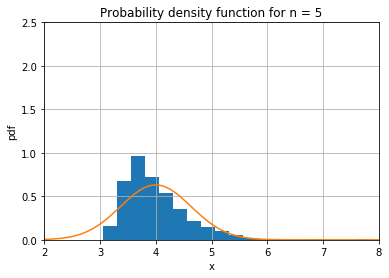

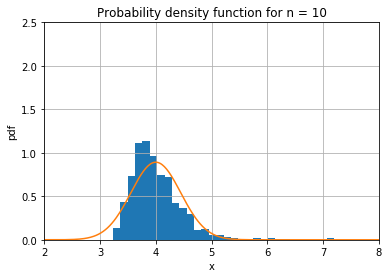

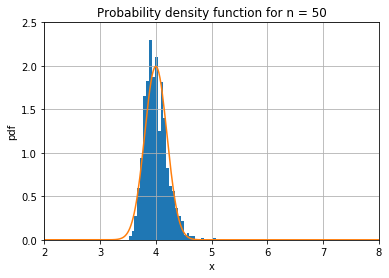

In [12]:
for i, n_i in enumerate(n):
    
    plt.hist(distribution_samples[i], bins=30, density=True)
    
    plt.title(f"Probability density function for n = {n_i}")
    
    plt.xlabel("x")
    plt.ylabel("pdf")
    
    plt.grid()
    plt.axis([2, 8, 0, 2.5])
    
    
    norm_dist = sts.norm(loc=distribution_sample_mean, scale=np.sqrt(distribution_sample_variance[i]))
    x = np.linspace(-10,10,1000)
    pdf = norm_dist.pdf(x)
    plt.plot(x, pdf)
    
    
    plt.show()

### Выводы по результатам задания

Распределение выборочных средних достаточно хорошо описывается нормальным распределением, что является утверждением центральной предельной теоремы.

С ростом n точность нормальной аппроксимации увеличивается.